
## Data Preprocessing Overview

*by Grace*

In data science, preprocessing is a crucial step that ensures the quality and integrity of data before feeding it to a machine learning model. Clean and well-prepared data can lead to better model performance and more accurate insights. This document will walk you through the key steps I undertook in the preprocessing phase.

### 1. **Data Transformation**
- **Objective:** Convert data into a suitable format or structure for analysis. This may involve scaling, encoding categorical variables, or other transformations.
  
### 2. **Outlier Detection**
- **Objective:** Identify and address extreme values that can adversely affect the performance of a machine learning model.
- **Method:** Use the Interquartile Range (IQR) and box plots to visually identify outliers. This method is robust for data with non-Gaussian distributions.
- **Next Steps:** Upon detection, outliers can be removed or imputed, depending on the data context and the potential impact on the analysis.
  
### 3. **Imputation of Missing Values**
- **Objective:** Handle missing data to prevent potential bias or misrepresentation in the analysis.
- **Method:** Use the median of the feature to fill missing values. This approach assumes that the missingness is random and that the median is a good representation for the missing value.
  
### 4. **Correlation Analysis**
- **Objective:** Understand the relationships between different features and between features and the target outcome.
- **Methods:** 
  - **Between-feature Correlation:** Analyse how different features relate to one another. This helps in understanding potential multicollinearity and redundancy.
  - **Feature-and-outcome Correlation:** Analyse how individual features relate to the target variable. This provides insights into which features might be most predictive.
  
### 5. **Feature Selection**
- **Objective:** Select the most relevant features for the model to prevent overfitting and reduce computational costs.
- **Methods:** 
  - **Point-biserial Correlation:** Used for binary outcome variable and continuous predictor variables. It provides insights into the linear relationship between the feature and the outcome.
  - **Logistic Regression:** By assessing the significance of each feature's coefficient in predicting a binary outcome, we can gauge the importance of each feature in the context of the model.



In [1]:
import pandas as pd


In [2]:
clinic_df = pd.read_csv('../data/clinic_df.csv')
lab_df = pd.read_csv('../data/lab_df.csv')


In [3]:
clinic_df

,Unnamed: 0,subject_id,gender,age,clinic_itemid,clinic_label,clinic_val,clinic_unit,dod
0,0,11164848,F,71,226763,HrApacheIIScore,2.0,NaN,2148-03-01
1,1,16665617,M,76,226763,HrApacheIIScore,2.0,NaN,2156-05-15
2,2,18539548,M,85,226763,HrApacheIIScore,0.0,NaN,2178-09-05
3,3,19305113,M,51,226763,HrApacheIIScore,2.0,NaN,2129-08-08
4,4,15274195,F,44,226763,HrApacheIIScore,2.0,NaN,2147-10-18
...,...,...,...,...,...,...,...,...,...
49899,49899,19011598,F,84,226253,SpO2 Desat Limit,88.0,%,NaN
49900,49900,19506108,M,64,226253,SpO2 Desat Limit,85.0,%,NaN
49901,49901,19805364,F,91,226253,SpO2 Desat Limit,88.0,%,2161-05-03
49902,49902,19812722,F,59,226253,SpO2 Desat Limit,86.0,%,NaN


In [4]:
lab_df


,Unnamed: 0,subject_id,gender,age,lab_label,lab_itemid,lab_val,lab_unit,dod
0,0,10078805,M,83,INR(PT),51237,1.0,NaN,2178-07-22
1,1,10280448,F,86,INR(PT),51237,1.2,NaN,2168-09-02
2,2,10299070,F,48,INR(PT),51237,1.3,NaN,2193-08-31
3,3,10680329,M,46,INR(PT),51237,1.1,NaN,NaN
4,4,10815009,F,71,INR(PT),51237,1.1,NaN,2134-03-20
...,...,...,...,...,...,...,...,...,...
62214,62214,19450460,F,68,Creatinine,50912,0.7,mg/dL,NaN
62215,62215,19719776,M,79,Creatinine,50912,1.1,mg/dL,NaN
62216,62216,19786037,F,82,Creatinine,50912,5.7,mg/dL,2177-11-02
62217,62217,19968075,M,61,Creatinine,50912,2.1,mg/dL,2153-04-23


## 1. Data Transformation


In [5]:
clinic_df

,Unnamed: 0,subject_id,gender,age,clinic_itemid,clinic_label,clinic_val,clinic_unit,dod
0,0,11164848,F,71,226763,HrApacheIIScore,2.0,NaN,2148-03-01
1,1,16665617,M,76,226763,HrApacheIIScore,2.0,NaN,2156-05-15
2,2,18539548,M,85,226763,HrApacheIIScore,0.0,NaN,2178-09-05
3,3,19305113,M,51,226763,HrApacheIIScore,2.0,NaN,2129-08-08
4,4,15274195,F,44,226763,HrApacheIIScore,2.0,NaN,2147-10-18
...,...,...,...,...,...,...,...,...,...
49899,49899,19011598,F,84,226253,SpO2 Desat Limit,88.0,%,NaN
49900,49900,19506108,M,64,226253,SpO2 Desat Limit,85.0,%,NaN
49901,49901,19805364,F,91,226253,SpO2 Desat Limit,88.0,%,2161-05-03
49902,49902,19812722,F,59,226253,SpO2 Desat Limit,86.0,%,NaN


In [6]:

df = clinic_df
# Pivoting the data
df_pivot = df.pivot(index='subject_id', columns='clinic_label', values='clinic_val').reset_index()

# Merging the pivoted data with original data to get the non-pivoted columns (like gender, age, etc.)
df_merged_clinic = pd.merge(df[['subject_id', 'gender', 'age']].drop_duplicates(), df_pivot, on='subject_id')

df_merged_clinic

,subject_id,gender,age,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Heart rate Alarm - High,HrApacheIIScore,Respiratory Rate,SpO2 Desat Limit,Temperature Celsius
0,11164848,F,71,45.0,71.0,115.0,135.0,2.0,20.0,85.0,NaN
1,16665617,M,76,56.0,102.0,61.0,135.0,2.0,27.0,85.0,NaN
2,18539548,M,85,67.0,123.0,99.0,120.0,0.0,24.0,85.0,NaN
3,19305113,M,51,74.0,105.0,64.0,120.0,2.0,17.0,85.0,NaN
4,15274195,F,44,42.0,96.0,73.0,120.0,2.0,24.0,85.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9429,19709667,F,91,NaN,NaN,62.0,130.0,NaN,20.0,85.0,NaN
9430,19844358,M,64,52.0,101.0,60.0,130.0,NaN,13.0,85.0,NaN
9431,19966316,M,71,59.0,90.0,80.0,120.0,NaN,18.0,85.0,NaN
9432,11984674,M,64,46.0,81.0,67.0,120.0,NaN,NaN,85.0,NaN


In [7]:
df = lab_df
# Pivoting the data
df_pivot = df.pivot(index='subject_id', columns='lab_label', values='lab_val').reset_index()

# Merging the pivoted data with original data to get the non-pivoted columns (like gender, age, etc.)
df_merged_lab = pd.merge(df[['subject_id', 'gender', 'age']].drop_duplicates(), df_pivot, on='subject_id')

df_merged_lab

,subject_id,gender,age,Albumin,"Albumin/Creatinine, Urine",Creatinine,Hemoglobin,INR(PT),PT,Sodium,Urea Nitrogen
0,10078805,M,83,3.9,NaN,1.6,NaN,1.0,10.3,140.0,37.0
1,10280448,F,86,NaN,NaN,3.4,NaN,1.2,13.0,139.0,48.0
2,10299070,F,48,2.8,NaN,3.8,11.0,1.3,13.2,131.0,9.0
3,10680329,M,46,3.6,NaN,0.8,11.2,1.1,13.0,139.0,18.0
4,10815009,F,71,1.7,NaN,1.3,NaN,1.1,14.6,131.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...
9429,19045194,M,53,4.4,NaN,1.0,12.0,NaN,NaN,134.0,6.0
9430,15707530,F,45,3.2,NaN,0.5,NaN,NaN,NaN,137.0,5.0
9431,11803171,F,91,NaN,NaN,1.1,NaN,NaN,NaN,134.0,111.0
9432,14597090,M,57,2.6,NaN,3.6,NaN,NaN,NaN,132.0,52.0


In [8]:

df = clinic_df
# Pivoting the data
df_pivot = df.pivot(index='subject_id', columns='clinic_label', values='clinic_val').reset_index()

# Merging the pivoted data with original data to get the non-pivoted columns (like gender, age, etc.)
df_demographic = pd.merge(df[['subject_id', 'gender', 'age','dod']].drop_duplicates(), df_pivot, on='subject_id')

df_demographic = df_demographic[['subject_id', 'gender','dod']]
df_demographic['dod'] = df_demographic['dod'].notna().astype(int)
df_demographic['gender'] = df_demographic['gender'].replace({'M': 0, 'F': 1})
df_demographic

,subject_id,gender,dod
0,11164848,1,1
1,16665617,0,1
2,18539548,0,1
3,19305113,0,1
4,15274195,1,1
...,...,...,...
9429,19709667,1,1
9430,19844358,0,1
9431,19966316,0,0
9432,11984674,0,0


## 2. EDA 
exploratory data analysis

### summary

In [9]:
print("Clinic Data:")
df_merged_clinic.describe()


Clinic Data:


,subject_id,age,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Heart rate Alarm - High,HrApacheIIScore,Respiratory Rate,SpO2 Desat Limit,Temperature Celsius
count,9.434000e+03,9434.000000,5223.000000,5222.000000,9433.000000,9424.000000,5.000000,9431.000000,9402.000000,1764.000000
mean,1.502709e+07,66.434280,74.067011,116.970701,85.247747,153.043081,1.600000,19.696109,85.985641,36.880385
std,2.898335e+06,15.422932,1178.185013,23.211132,18.436846,1903.348130,0.894427,5.995695,2.017398,4.355161
min,1.000201e+07,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,1.252415e+07,57.000000,49.000000,101.000000,72.000000,120.000000,2.000000,16.000000,85.000000,36.100000
50%,1.507287e+07,68.000000,56.000000,115.000000,84.000000,120.000000,2.000000,19.000000,85.000000,36.800000
75%,1.756300e+07,78.000000,65.000000,130.000000,96.000000,130.000000,2.000000,23.000000,88.000000,37.500000
max,1.999983e+07,91.000000,85200.000000,283.000000,187.000000,140110.000000,2.000000,72.000000,100.000000,100.300000


In [10]:

print("\nLab Data:")
df_merged_lab.describe()


Lab Data:


,subject_id,age,Albumin,"Albumin/Creatinine, Urine",Creatinine,Hemoglobin,INR(PT),PT,Sodium,Urea Nitrogen
count,9.434000e+03,9434.000000,8545.000000,1161.000000,9428.000000,5336.000000,9318.000000,9308.000000,9432.000000,9430.000000
mean,1.502709e+07,66.434280,3.450158,578.031266,1.821245,10.253767,1.473416,16.166008,138.453138,31.586744
std,2.898335e+06,15.422932,0.750384,1733.147004,1.803955,2.342207,0.773676,8.036275,5.031881,23.574975
min,1.000201e+07,18.000000,0.200000,1.500000,0.100000,0.000000,0.500000,8.400000,97.000000,1.000000
25%,1.252415e+07,57.000000,2.900000,13.500000,0.900000,8.500000,1.100000,12.200000,136.000000,16.000000
50%,1.507287e+07,68.000000,3.500000,57.100000,1.200000,10.100000,1.200000,13.700000,139.000000,24.000000
75%,1.756300e+07,78.000000,4.000000,310.100000,2.000000,11.800000,1.500000,16.600000,141.000000,40.000000
max,1.999983e+07,91.000000,5.700000,25235.000000,22.700000,19.300000,13.600000,150.000000,178.000000,260.000000


### missing value

In [11]:
df_merged_clinic

,subject_id,gender,age,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Heart rate Alarm - High,HrApacheIIScore,Respiratory Rate,SpO2 Desat Limit,Temperature Celsius
0,11164848,F,71,45.0,71.0,115.0,135.0,2.0,20.0,85.0,NaN
1,16665617,M,76,56.0,102.0,61.0,135.0,2.0,27.0,85.0,NaN
2,18539548,M,85,67.0,123.0,99.0,120.0,0.0,24.0,85.0,NaN
3,19305113,M,51,74.0,105.0,64.0,120.0,2.0,17.0,85.0,NaN
4,15274195,F,44,42.0,96.0,73.0,120.0,2.0,24.0,85.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9429,19709667,F,91,NaN,NaN,62.0,130.0,NaN,20.0,85.0,NaN
9430,19844358,M,64,52.0,101.0,60.0,130.0,NaN,13.0,85.0,NaN
9431,19966316,M,71,59.0,90.0,80.0,120.0,NaN,18.0,85.0,NaN
9432,11984674,M,64,46.0,81.0,67.0,120.0,NaN,NaN,85.0,NaN


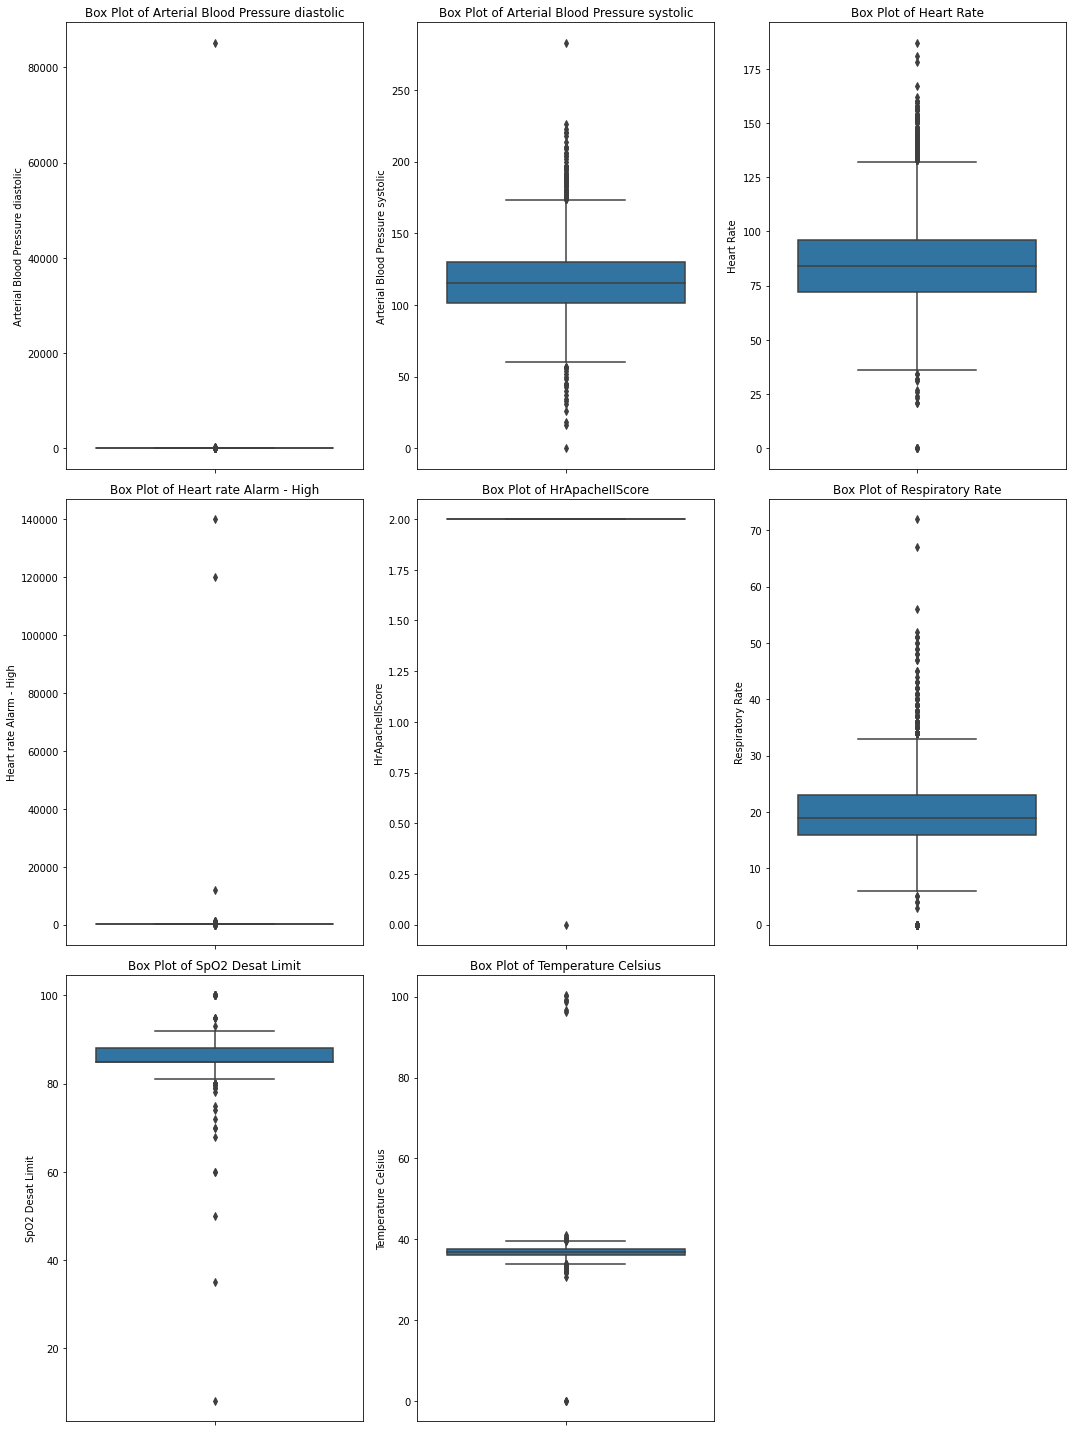

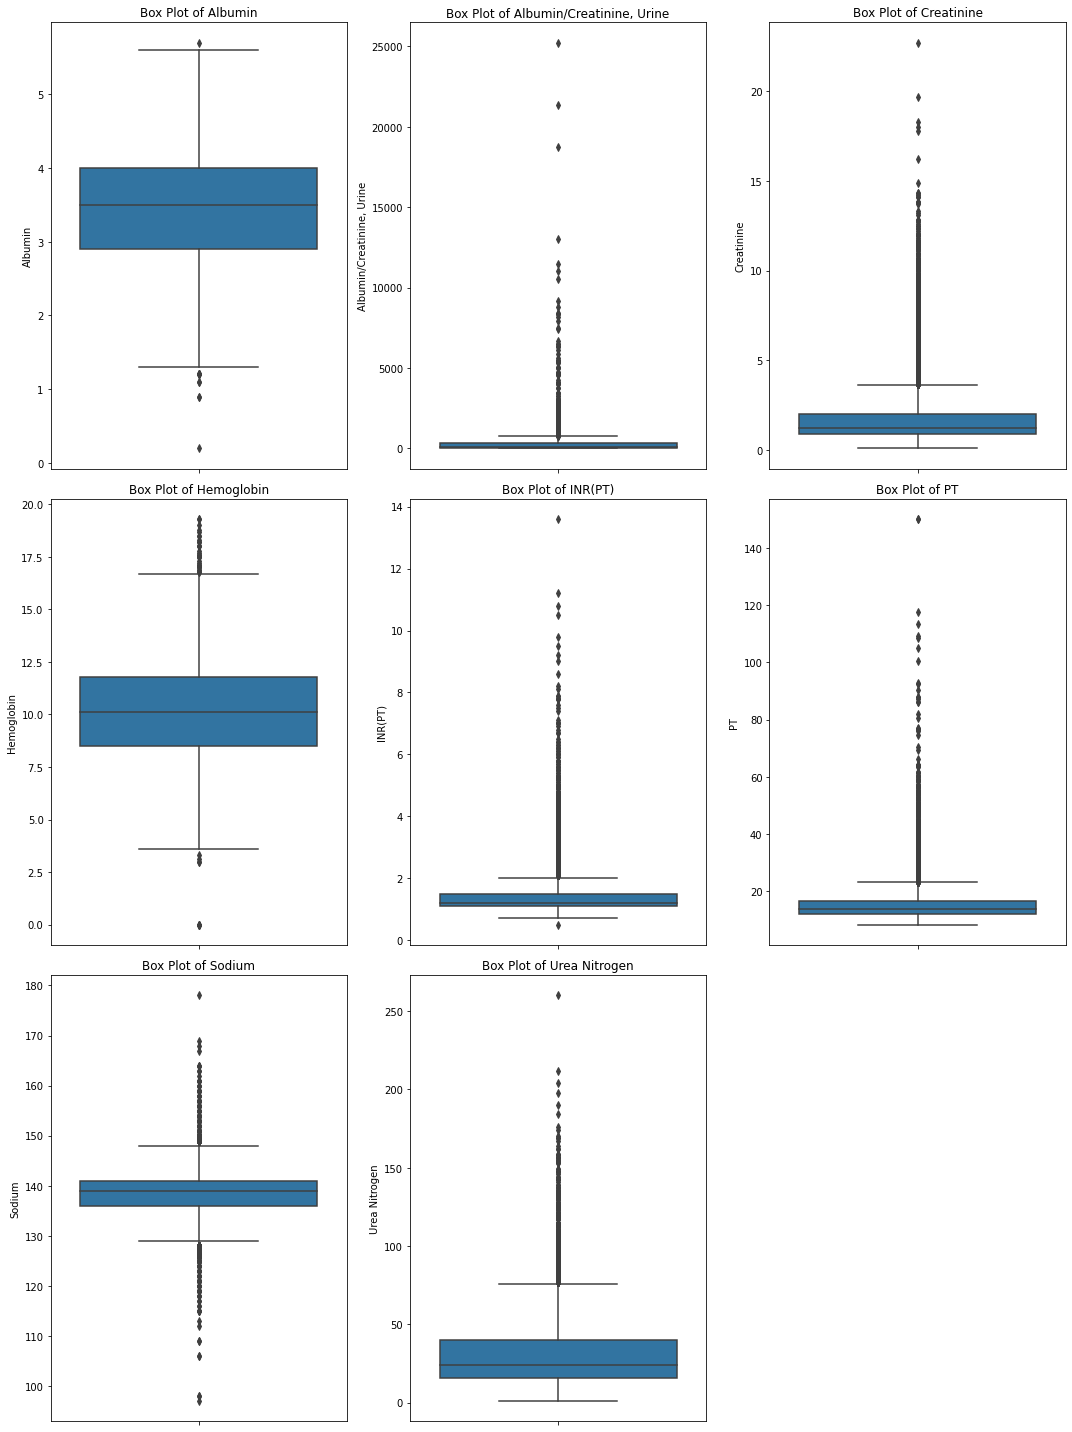

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to dynamically determine rows and cols for subplots
def determine_grid(num_plots):
    cols = int(np.ceil(np.sqrt(num_plots)))
    rows = int(np.ceil(num_plots / cols))
    return rows, cols

# Clinic Data
num_plots = len(df_merged_clinic.columns) - 3  # Minus subject_id, gender, and age
rows, cols = determine_grid(num_plots)

fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
axes = axes.ravel()  # Flattening to easily iterate

for index, column in enumerate(df_merged_clinic.columns[3:]):
    sns.boxplot(y=df_merged_clinic[column], ax=axes[index])
    axes[index].set_title(f'Box Plot of {column}')

# Remove any unused subplots
for idx in range(num_plots, rows*cols):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Similarly for Lab Data
num_plots = len(df_merged_lab.columns) - 3
rows, cols = determine_grid(num_plots)

fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
axes = axes.ravel()

for index, column in enumerate(df_merged_lab.columns[3:]):
    sns.boxplot(y=df_merged_lab[column], ax=axes[index])
    axes[index].set_title(f'Box Plot of {column}')

for idx in range(num_plots, rows*cols):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


From the above box plots, we can see that there are many outliers. Hence, we will replace outliers with NA. We are not removing outliers because if will result in lack of data (around 3000 will be removed, and only 3000 left for clinic, and all data will be removed for lab) and inconsistency for lab data and clinic data. 

### outlier deletion with IQR

In [13]:
df_merged_lab

,subject_id,gender,age,Albumin,"Albumin/Creatinine, Urine",Creatinine,Hemoglobin,INR(PT),PT,Sodium,Urea Nitrogen
0,10078805,M,83,3.9,NaN,1.6,NaN,1.0,10.3,140.0,37.0
1,10280448,F,86,NaN,NaN,3.4,NaN,1.2,13.0,139.0,48.0
2,10299070,F,48,2.8,NaN,3.8,11.0,1.3,13.2,131.0,9.0
3,10680329,M,46,3.6,NaN,0.8,11.2,1.1,13.0,139.0,18.0
4,10815009,F,71,1.7,NaN,1.3,NaN,1.1,14.6,131.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...
9429,19045194,M,53,4.4,NaN,1.0,12.0,NaN,NaN,134.0,6.0
9430,15707530,F,45,3.2,NaN,0.5,NaN,NaN,NaN,137.0,5.0
9431,11803171,F,91,NaN,NaN,1.1,NaN,NaN,NaN,134.0,111.0
9432,14597090,M,57,2.6,NaN,3.6,NaN,NaN,NaN,132.0,52.0


In [14]:
def remove_outliers_columnwise(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Only replace values outside bounds with NaN for now
    for col in df.columns:
        df[col] = df[col].where((df[col] >= lower_bound[col]) & (df[col] <= upper_bound[col]), np.nan)

    return df

# Extract the lab item columns
lab_items = df_merged_lab.iloc[:, 3:].copy()
clinic_items = df_merged_clinic.iloc[:, 3:].copy()


# Remove outliers column-wise
lab_items_clean = remove_outliers_columnwise(lab_items)
clinic_items_clean = remove_outliers_columnwise(clinic_items)


# Merge back the cleaned lab items with the original demographic columns
df_merged_lab_clean = pd.concat([df_merged_lab.iloc[:, :3], lab_items_clean], axis=1)
df_merged_clinic_clean = pd.concat([df_merged_clinic.iloc[:, :3], lab_items_clean], axis=1)


In [15]:
df_merged_lab_clean

,subject_id,gender,age,Albumin,"Albumin/Creatinine, Urine",Creatinine,Hemoglobin,INR(PT),PT,Sodium,Urea Nitrogen
0,10078805,M,83,3.9,NaN,1.6,NaN,1.0,10.3,140.0,37.0
1,10280448,F,86,NaN,NaN,3.4,NaN,1.2,13.0,139.0,48.0
2,10299070,F,48,2.8,NaN,NaN,11.0,1.3,13.2,131.0,9.0
3,10680329,M,46,3.6,NaN,0.8,11.2,1.1,13.0,139.0,18.0
4,10815009,F,71,1.7,NaN,1.3,NaN,1.1,14.6,131.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...
9429,19045194,M,53,4.4,NaN,1.0,12.0,NaN,NaN,134.0,6.0
9430,15707530,F,45,3.2,NaN,0.5,NaN,NaN,NaN,137.0,5.0
9431,11803171,F,91,NaN,NaN,1.1,NaN,NaN,NaN,134.0,NaN
9432,14597090,M,57,2.6,NaN,3.6,NaN,NaN,NaN,132.0,52.0


In [16]:
df_merged_clinic_clean

,subject_id,gender,age,Albumin,"Albumin/Creatinine, Urine",Creatinine,Hemoglobin,INR(PT),PT,Sodium,Urea Nitrogen
0,11164848,F,71,3.9,NaN,1.6,NaN,1.0,10.3,140.0,37.0
1,16665617,M,76,NaN,NaN,3.4,NaN,1.2,13.0,139.0,48.0
2,18539548,M,85,2.8,NaN,NaN,11.0,1.3,13.2,131.0,9.0
3,19305113,M,51,3.6,NaN,0.8,11.2,1.1,13.0,139.0,18.0
4,15274195,F,44,1.7,NaN,1.3,NaN,1.1,14.6,131.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...
9429,19709667,F,91,4.4,NaN,1.0,12.0,NaN,NaN,134.0,6.0
9430,19844358,M,64,3.2,NaN,0.5,NaN,NaN,NaN,137.0,5.0
9431,19966316,M,71,NaN,NaN,1.1,NaN,NaN,NaN,134.0,NaN
9432,11984674,M,64,2.6,NaN,3.6,NaN,NaN,NaN,132.0,52.0


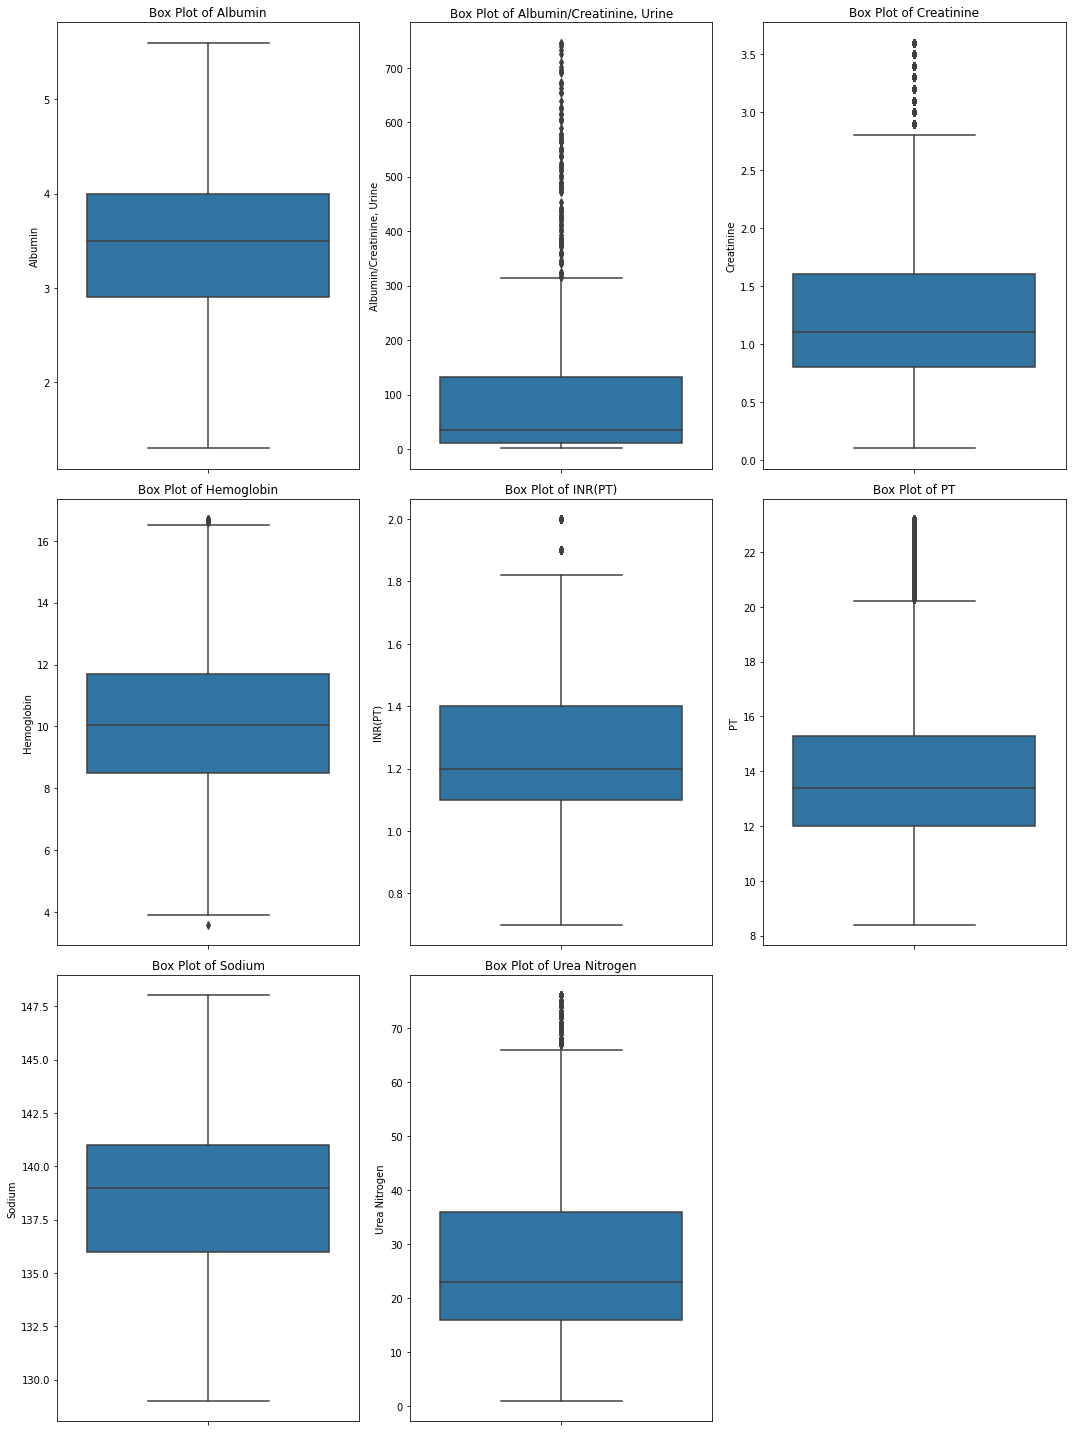

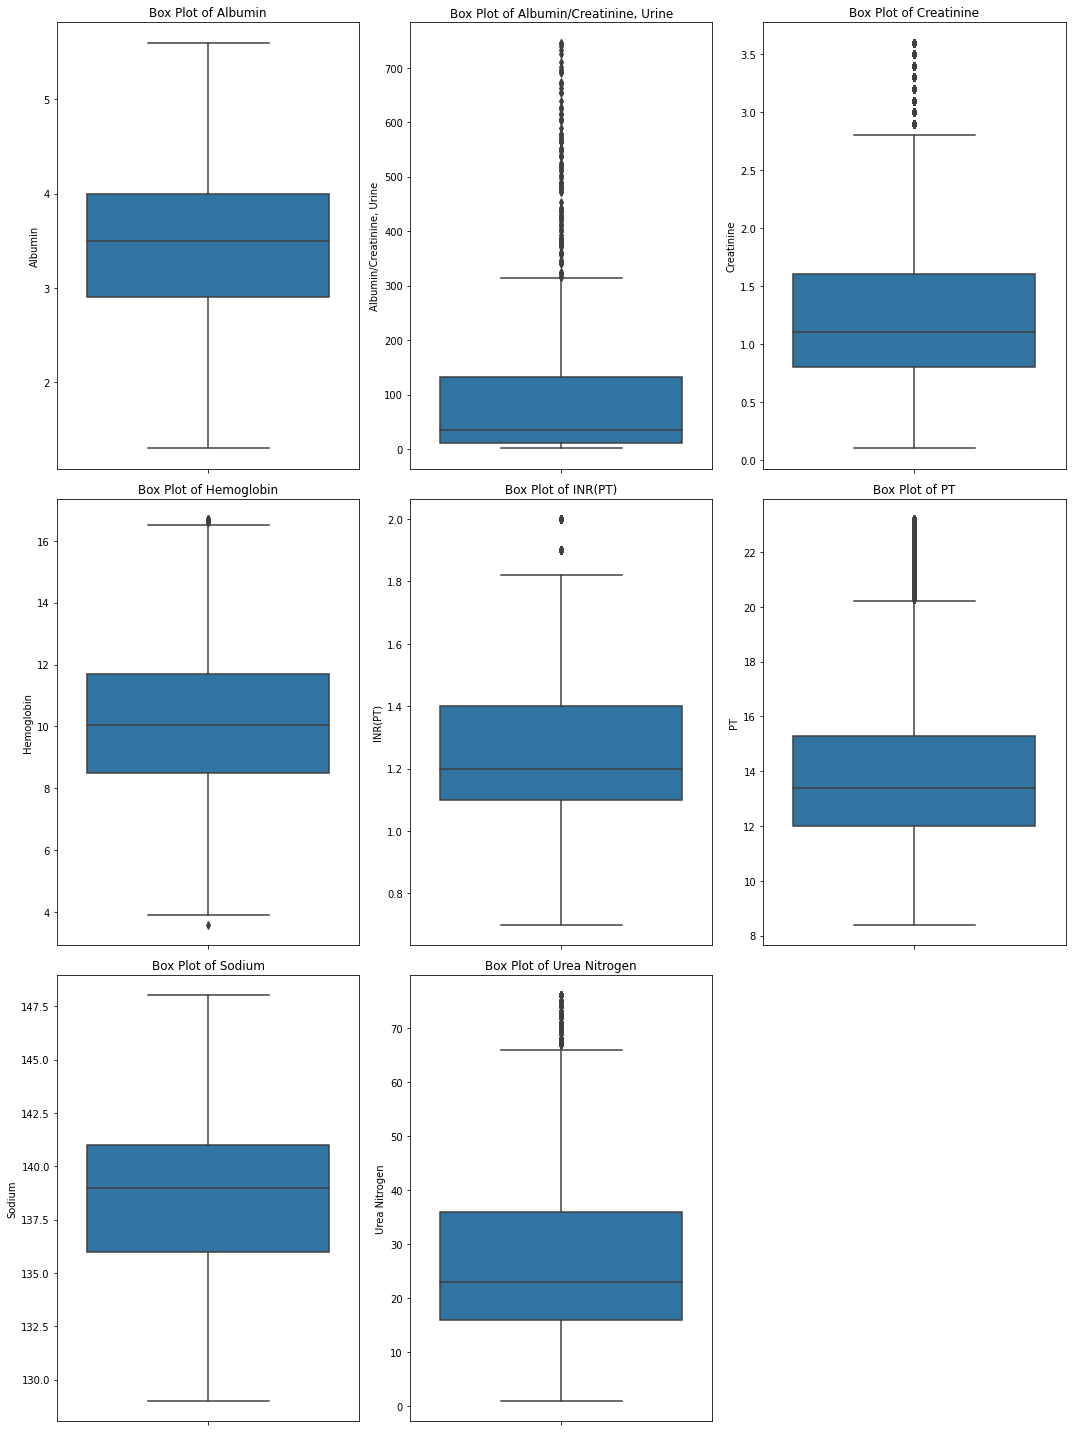

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to dynamically determine rows and cols for subplots
def determine_grid(num_plots):
    cols = int(np.ceil(np.sqrt(num_plots)))
    rows = int(np.ceil(num_plots / cols))
    return rows, cols

# Box Plots for Cleaned Clinic Data
num_plots = len(df_merged_clinic_clean.columns) - 3  # Minus subject_id, gender, and age
rows, cols = determine_grid(num_plots)

fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
axes = axes.ravel()  # Flattening to easily iterate

for index, column in enumerate(df_merged_clinic_clean.columns[3:]):
    sns.boxplot(y=df_merged_clinic_clean[column], ax=axes[index])
    axes[index].set_title(f'Box Plot of {column}')

# Remove any unused subplots
for idx in range(num_plots, rows*cols):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Box Plots for Cleaned Lab Data
num_plots = len(df_merged_lab_clean.columns) - 3
rows, cols = determine_grid(num_plots)

fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
axes = axes.ravel()

for index, column in enumerate(df_merged_lab_clean.columns[3:]):
    sns.boxplot(y=df_merged_lab_clean[column], ax=axes[index])
    axes[index].set_title(f'Box Plot of {column}')

for idx in range(num_plots, rows*cols):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


In [18]:
print("Missing values in Clinic Data:")
print(df_merged_clinic.isnull().sum())

Missing values in Clinic Data:
subject_id                              0
gender                                  0
age                                     0
Arterial Blood Pressure diastolic    4211
Arterial Blood Pressure systolic     4212
Heart Rate                              1
Heart rate Alarm - High                10
HrApacheIIScore                      9429
Respiratory Rate                        3
SpO2 Desat Limit                       32
Temperature Celsius                  7670
dtype: int64


In [19]:
df_merged_clinic.columns

Index(['subject_id', 'gender', 'age', 'Arterial Blood Pressure diastolic',
       'Arterial Blood Pressure systolic', 'Heart Rate',
       'Heart rate Alarm - High', 'HrApacheIIScore', 'Respiratory Rate',
       'SpO2 Desat Limit', 'Temperature Celsius'],
      dtype='object')

In [20]:
# drop HrApacheIIScore and imupte with mean for Heart rate Alarm - High, and Respiratory Rate
if 'HrApacheIIScore' in df_merged_clinic.columns:
    df_merged_clinic.drop(columns=['HrApacheIIScore'], inplace=True)
# Impute missing values in "Heart rate Alarm - High" with its mean
df_merged_clinic['Heart rate Alarm - High'].fillna(df_merged_clinic['Heart rate Alarm - High'].median(), inplace=True)
# Impute missing values in "Respiratory Rate" with its mean
df_merged_clinic['Respiratory Rate'].fillna(df_merged_clinic['Respiratory Rate'].median(), inplace=True)


In [21]:
df_merged_clinic

,subject_id,gender,age,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Heart rate Alarm - High,Respiratory Rate,SpO2 Desat Limit,Temperature Celsius
0,11164848,F,71,45.0,71.0,115.0,135.0,20.0,85.0,NaN
1,16665617,M,76,56.0,102.0,61.0,135.0,27.0,85.0,NaN
2,18539548,M,85,67.0,123.0,99.0,120.0,24.0,85.0,NaN
3,19305113,M,51,74.0,105.0,64.0,120.0,17.0,85.0,NaN
4,15274195,F,44,42.0,96.0,73.0,120.0,24.0,85.0,NaN
...,...,...,...,...,...,...,...,...,...,...
9429,19709667,F,91,NaN,NaN,62.0,130.0,20.0,85.0,NaN
9430,19844358,M,64,52.0,101.0,60.0,130.0,13.0,85.0,NaN
9431,19966316,M,71,59.0,90.0,80.0,120.0,18.0,85.0,NaN
9432,11984674,M,64,46.0,81.0,67.0,120.0,19.0,85.0,NaN


In [22]:
df_merged_clinic.isnull().sum()

subject_id                              0
gender                                  0
age                                     0
Arterial Blood Pressure diastolic    4211
Arterial Blood Pressure systolic     4212
Heart Rate                              1
Heart rate Alarm - High                 0
Respiratory Rate                        0
SpO2 Desat Limit                       32
Temperature Celsius                  7670
dtype: int64

In [23]:
print("\nMissing values in Lab Data:")
print(df_merged_lab.isnull().sum())


Missing values in Lab Data:
subject_id                      0
gender                          0
age                             0
Albumin                       889
Albumin/Creatinine, Urine    8273
Creatinine                      6
Hemoglobin                   4098
INR(PT)                       116
PT                            126
Sodium                          2
Urea Nitrogen                   4
dtype: int64


Drop white blood cells as 6180/6182 are missing, and Temperature(3007/6182) are missing

In [24]:
df_merged_clinic.isnull().sum()

subject_id                              0
gender                                  0
age                                     0
Arterial Blood Pressure diastolic    4211
Arterial Blood Pressure systolic     4212
Heart Rate                              1
Heart rate Alarm - High                 0
Respiratory Rate                        0
SpO2 Desat Limit                       32
Temperature Celsius                  7670
dtype: int64

In [25]:
# Calculate the threshold for 60% non-missing values
thresh = df_merged_clinic.shape[0] * 0.4 

# Drop columns with more than 60% missing values
df_merged_clinic.dropna(axis=1, thresh=thresh, inplace=True)
df_merged_clinic.isnull().sum()

subject_id                              0
gender                                  0
age                                     0
Arterial Blood Pressure diastolic    4211
Arterial Blood Pressure systolic     4212
Heart Rate                              1
Heart rate Alarm - High                 0
Respiratory Rate                        0
SpO2 Desat Limit                       32
dtype: int64

In [26]:
# Calculate the threshold for 60% non-missing values
thresh = df_merged_lab.shape[0] * 0.4 

# Drop columns with more than 60% missing values
df_merged_lab.dropna(axis=1, thresh=thresh, inplace=True)
df_merged_lab.isnull().sum()

subject_id          0
gender              0
age                 0
Albumin           889
Creatinine          6
Hemoglobin       4098
INR(PT)           116
PT                126
Sodium              2
Urea Nitrogen       4
dtype: int64

For other columns, fill in with mean

In [27]:
def columns_with_missing_values(df):
    """Return a list of columns with missing values in the dataframe."""
    return [col for col in df.columns if df[col].isnull().sum() > 0]

# For df_merged_lab
cols_to_fill_lab = columns_with_missing_values(df_merged_lab)

# For df_merged_clinic
cols_to_fill_clinic = columns_with_missing_values(df_merged_clinic)

# Function to fill missing values with median
def fill_missing_with_median(df, cols_to_fill):
    for col in cols_to_fill:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)

# Apply function to both dataframes
fill_missing_with_median(df_merged_lab, cols_to_fill_lab)
fill_missing_with_median(df_merged_clinic, cols_to_fill_clinic)



In [28]:
#Q8 pipelining

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [29]:
print(df_merged_lab.isnull().sum())


subject_id       0
gender           0
age              0
Albumin          0
Creatinine       0
Hemoglobin       0
INR(PT)          0
PT               0
Sodium           0
Urea Nitrogen    0
dtype: int64


### Up to here we've complete the following:
1. data transformation
2. replace outliers by NA using IQR
3. imputation with NA: 
    1. if too many missing (> 50%), remove the whole column
    2. filling with median (as data are continuos)

### In the following section, we will:
1. data distribution visualisation
2. merge lab data with clinic data
3. further EDA
4. risk factor analysis, select significant features for ml modeling

###  Data Distribution Visualisation


In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distributions(df, title_prefix):
    """Plot distributions for each column in a dataframe."""
    num_cols = df.shape[1]
    fig, axes = plt.subplots(nrows=num_cols, figsize=(7, 4*num_cols))
    
    for col, ax in zip(df.columns, axes):
        sns.histplot(df[col], kde=True, ax=ax)
        ax.set_title(f'Distribution of {title_prefix} {col}')
    
    plt.tight_layout()
    plt.show()

# Visualize distributions for clinic data
plot_distributions(df_merged_clinic, 'Clinic Data -')

# Visualize distributions for lab data
plot_distributions(df_merged_lab, 'Lab Data -')


KeyboardInterrupt: 

In [50]:
df_merged_lab

,subject_id,Albumin,Creatinine,Hemoglobin,INR(PT),PT,Sodium,Urea Nitrogen
0,10078805,3.9,1.6,10.1,1.0,10.3,140.0,37.0
1,10280448,3.5,3.4,10.1,1.2,13.0,139.0,48.0
2,10299070,2.8,3.8,11.0,1.3,13.2,131.0,9.0
3,10680329,3.6,0.8,11.2,1.1,13.0,139.0,18.0
4,10815009,1.7,1.3,10.1,1.1,14.6,131.0,30.0
...,...,...,...,...,...,...,...,...
9429,19045194,4.4,1.0,12.0,1.2,13.7,134.0,6.0
9430,15707530,3.2,0.5,10.1,1.2,13.7,137.0,5.0
9431,11803171,3.5,1.1,10.1,1.2,13.7,134.0,111.0
9432,14597090,2.6,3.6,10.1,1.2,13.7,132.0,52.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to dynamically determine rows and cols for subplots
def determine_grid(num_plots):
    cols = int(np.ceil(np.sqrt(num_plots)))
    rows = int(np.ceil(num_plots / cols))
    return rows, cols

# Clinic Data
num_plots = len(df_merged_clinic.columns) - 3  # Minus subject_id, gender, and age
rows, cols = determine_grid(num_plots)

fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
axes = axes.ravel()  # Flattening to easily iterate

for index, column in enumerate(df_merged_clinic.columns[3:]):
    sns.histplot(df_merged_clinic[column], kde=True, ax=axes[index])
    axes[index].set_title(f'Distribution of {column}')

# Remove any unused subplots
for idx in range(num_plots, rows*cols):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Similarly for Lab Data
num_plots = len(df_merged_lab.columns) - 3
rows, cols = determine_grid(num_plots)

fig, axes = plt.subplots(rows, cols, figsize=(15, 20))
axes = axes.ravel()

for index, column in enumerate(df_merged_lab.columns[3:]):
    sns.histplot(df_merged_lab[column], kde=True, ax=axes[index])
    axes[index].set_title(f'Distribution of {column}')

for idx in range(num_plots, rows*cols):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


### Comment:
As we can see, after our manipulation with the data (outlier removal, missing value imputation, etc.) most of the data demonstrate Gaussian distribution which indicates that are data is appropriate for further analysis.

### Correlation analysis (within features)

In [30]:
df_merged_clinic

,subject_id,gender,age,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Heart rate Alarm - High,Respiratory Rate,SpO2 Desat Limit
0,11164848,F,71,45.0,71.0,115.0,135.0,20.0,85.0
1,16665617,M,76,56.0,102.0,61.0,135.0,27.0,85.0
2,18539548,M,85,67.0,123.0,99.0,120.0,24.0,85.0
3,19305113,M,51,74.0,105.0,64.0,120.0,17.0,85.0
4,15274195,F,44,42.0,96.0,73.0,120.0,24.0,85.0
...,...,...,...,...,...,...,...,...,...
9429,19709667,F,91,56.0,115.0,62.0,130.0,20.0,85.0
9430,19844358,M,64,52.0,101.0,60.0,130.0,13.0,85.0
9431,19966316,M,71,59.0,90.0,80.0,120.0,18.0,85.0
9432,11984674,M,64,46.0,81.0,67.0,120.0,19.0,85.0


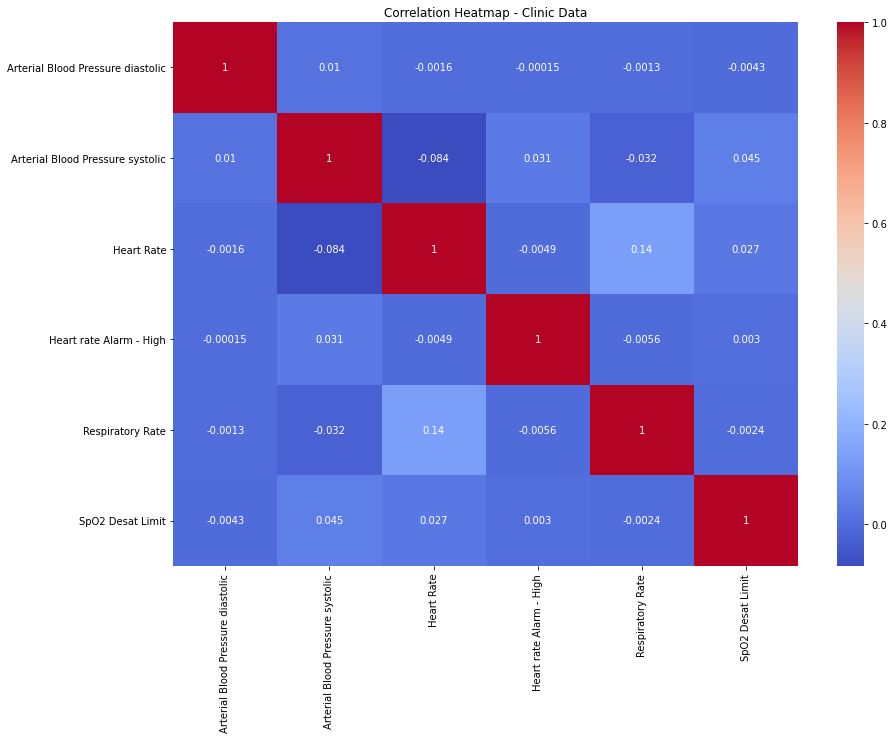

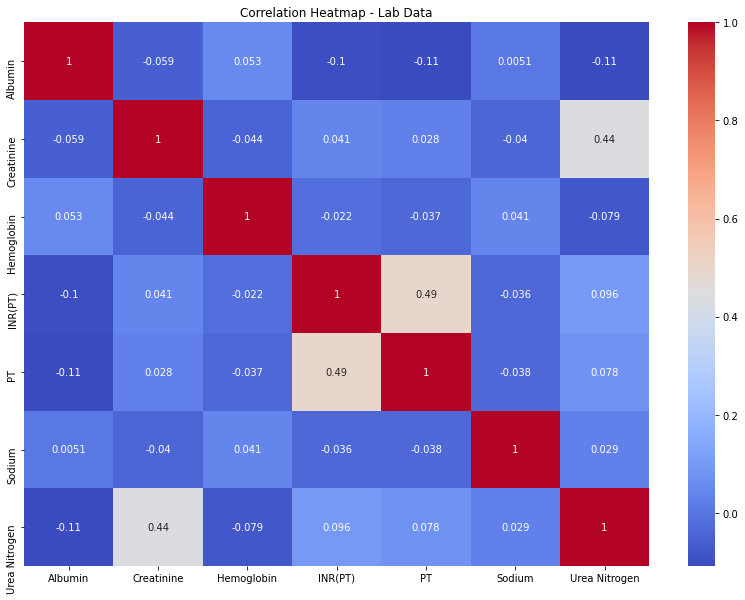

In [31]:
# Correlation heatmap for Clinic Data
plt.figure(figsize=(14, 10))
sns.heatmap(df_merged_clinic.iloc[:, 3:].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Clinic Data")
plt.show()

# Correlation heatmap for Lab Data
plt.figure(figsize=(14, 10))
sns.heatmap(df_merged_lab.iloc[:, 3:].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Lab Data")
plt.show()


Looks like little correlation between features

In [32]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df is data frame with all the predictors
#df_merged_clinic.drop(columns=['gender', 'age'])
if 'gender' in df_merged_clinic.columns:
    df_merged_clinic.drop(columns=['gender', 'age'], inplace=True)
if 'gender' in df_merged_lab.columns:
    df_merged_lab.drop(columns=['age','gender'], inplace=True)
df_total = df_demographic.merge(df_merged_clinic, on="subject_id").merge(df_merged_lab, on="subject_id")

df = df_total
# Add a constant to the model (intercept)
df["Intercept"] = 1

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

print(vif_data)

                             Variable          VIF
0                          subject_id     1.001163
1                              gender     1.033583
2                                 dod     1.135631
3   Arterial Blood Pressure diastolic     1.000726
4    Arterial Blood Pressure systolic     1.024300
5                          Heart Rate     1.044956
6             Heart rate Alarm - High     1.001324
7                    Respiratory Rate     1.038789
8                    SpO2 Desat Limit     1.008761
9                             Albumin     1.095998
10                         Creatinine     1.251147
11                         Hemoglobin     1.026176
12                            INR(PT)     1.344053
13                                 PT     1.341527
14                             Sodium     1.014214
15                      Urea Nitrogen     1.298323
16                          Intercept  2637.436539


Interpreting VIF:

- A rule of thumb is that if VIF is above 5-10, then multicollinearity is high.
- VIF = 1 implies no multicollinearity.
- VIF between 1 and 5 implies moderate multicollinearity.

#### Comments:
In conclusion, based on the heat map and VIF values, multicollinearity doesn't appear to be a concern for our dataset. This is good news because it means that each variable brings its own unique information to the regression equation.

### Merge lab, clinic, and demographic data

In [33]:
df_comorbidity = pd.read_csv('../data/comorbidity.csv')

In [34]:
#df_merged_clinic.drop(columns=['gender', 'age'])
if 'gender' in df_merged_clinic.columns:
    df_merged_clinic.drop(columns=['gender', 'age'], inplace=True)
if 'gender' in df_merged_lab.columns:
    df_merged_lab.drop(columns=['age','gender'], inplace=True)

In [35]:
df_lab_clinic = df_demographic.merge(df_merged_clinic, on="subject_id").merge(df_merged_lab, on="subject_id")
df_total = df_lab_clinic.merge(df_comorbidity, on="subject_id")


In [36]:
#df_total = df_total.drop(columns="Unnamed: 0")
df_total

,subject_id,gender,dod,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Heart rate Alarm - High,Respiratory Rate,SpO2 Desat Limit,Albumin,...,Hemoglobin,INR(PT),PT,Sodium,Urea Nitrogen,Unnamed: 0,diabetes,hypertension,chronic_kidney_disease,sepsis
0,11164848,1,1,45.0,71.0,115.0,135.0,20.0,85.0,2.8,...,9.8,1.4,19.1,138.0,43.0,4347,1,1,0,0
1,16665617,0,1,56.0,102.0,61.0,135.0,27.0,85.0,3.5,...,11.1,2.9,26.1,138.0,36.0,5264,0,0,0,0
2,18539548,0,1,67.0,123.0,99.0,120.0,24.0,85.0,3.6,...,9.7,3.4,16.0,133.0,64.0,7872,1,0,0,0
3,19305113,0,1,74.0,105.0,64.0,120.0,17.0,85.0,2.4,...,10.1,1.5,14.5,147.0,62.0,2041,0,0,0,0
4,15274195,1,1,42.0,96.0,73.0,120.0,24.0,85.0,3.0,...,8.3,2.7,27.8,137.0,14.0,4180,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9429,19709667,1,1,56.0,115.0,62.0,130.0,20.0,85.0,3.5,...,10.1,1.1,12.7,141.0,29.0,5299,0,0,0,0
9430,19844358,0,1,52.0,101.0,60.0,130.0,13.0,85.0,2.7,...,11.7,1.7,14.5,134.0,44.0,8174,0,0,1,1
9431,19966316,0,0,59.0,90.0,80.0,120.0,18.0,85.0,3.8,...,8.2,1.2,14.1,137.0,21.0,947,1,1,0,0
9432,11984674,0,0,46.0,81.0,67.0,120.0,19.0,85.0,3.8,...,9.8,2.1,13.0,140.0,16.0,827,0,1,0,0


In [37]:
df_total_columns = list(df_total.columns)  # Assuming df_total.columns returns a pandas Index object
df_categorical = ['subject_id', 'gender', 'dod','diabetes', 'hypertension', 'chronic_kidney_disease','sepsis']

df_continuous = [col for col in df_total_columns if col not in df_categorical]


### Correlation analysis (between features and mortality)
We will analyse correlation between features and mortality with following approach:
1. point-biserial correlation
2. logistic regression

based on the following criteria:

1. **Correlation Value (r)**:
    - It represents the strength and direction of the linear relationship between the feature and mortality.
    - A positive value suggests that as the feature value increases, the likelihood of mortality (`dod = 1`) also increases, and vice-versa.
    - A negative value suggests an inverse relationship: as the feature value increases, the likelihood of mortality decreases.
    - The magnitude of this correlation value (irrespective of its sign) tells about the strength of the relationship. Values closer to 1 or -1 represent stronger relationships.

2. **P-Value**:
    - It assesses the significance of the observed correlation. 
    - A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis. In other words, it suggests that the observed correlation is statistically significant and is unlikely due to random chance.
    - A large p-value (> 0.05) suggests that the observed correlation may be due to random chance.


#### Point-biserial correlation:

In [38]:
df_merged_clinic

,subject_id,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Heart rate Alarm - High,Respiratory Rate,SpO2 Desat Limit
0,11164848,45.0,71.0,115.0,135.0,20.0,85.0
1,16665617,56.0,102.0,61.0,135.0,27.0,85.0
2,18539548,67.0,123.0,99.0,120.0,24.0,85.0
3,19305113,74.0,105.0,64.0,120.0,17.0,85.0
4,15274195,42.0,96.0,73.0,120.0,24.0,85.0
...,...,...,...,...,...,...,...
9429,19709667,56.0,115.0,62.0,130.0,20.0,85.0
9430,19844358,52.0,101.0,60.0,130.0,13.0,85.0
9431,19966316,59.0,90.0,80.0,120.0,18.0,85.0
9432,11984674,46.0,81.0,67.0,120.0,19.0,85.0


In [39]:
df_merged_lab

,subject_id,Albumin,Creatinine,Hemoglobin,INR(PT),PT,Sodium,Urea Nitrogen
0,10078805,3.9,1.6,10.1,1.0,10.3,140.0,37.0
1,10280448,3.5,3.4,10.1,1.2,13.0,139.0,48.0
2,10299070,2.8,3.8,11.0,1.3,13.2,131.0,9.0
3,10680329,3.6,0.8,11.2,1.1,13.0,139.0,18.0
4,10815009,1.7,1.3,10.1,1.1,14.6,131.0,30.0
...,...,...,...,...,...,...,...,...
9429,19045194,4.4,1.0,12.0,1.2,13.7,134.0,6.0
9430,15707530,3.2,0.5,10.1,1.2,13.7,137.0,5.0
9431,11803171,3.5,1.1,10.1,1.2,13.7,134.0,111.0
9432,14597090,2.6,3.6,10.1,1.2,13.7,132.0,52.0


In [40]:
from scipy.stats import pointbiserialr

# List of continuous features from the datasets
features = df_continuous

# Calculate and print point-biserial correlation for each feature with 'dod'
for feature in features:
    pbc = pointbiserialr(df_total[feature], df_total['dod'])
    print(f"Correlation with mortality for {feature}: {pbc.correlation:.3f} (p={pbc.pvalue:.3e})")


Correlation with mortality for Arterial Blood Pressure diastolic: 0.011 (p=2.755e-01)
Correlation with mortality for Arterial Blood Pressure systolic: -0.071 (p=4.124e-12)
Correlation with mortality for Heart Rate: 0.090 (p=2.470e-18)
Correlation with mortality for Heart rate Alarm - High: -0.012 (p=2.346e-01)
Correlation with mortality for Respiratory Rate: 0.113 (p=3.729e-28)
Correlation with mortality for SpO2 Desat Limit: 0.007 (p=4.683e-01)
Correlation with mortality for Albumin: -0.247 (p=4.721e-131)
Correlation with mortality for Creatinine: 0.068 (p=3.981e-11)
Correlation with mortality for Hemoglobin: -0.020 (p=4.739e-02)
Correlation with mortality for INR(PT): 0.158 (p=6.913e-54)
Correlation with mortality for PT: 0.157 (p=2.048e-53)
Correlation with mortality for Sodium: 0.004 (p=6.800e-01)
Correlation with mortality for Urea Nitrogen: 0.183 (p=7.623e-72)
Correlation with mortality for Unnamed: 0: 0.009 (p=3.690e-01)


Based on our updated analysis, here's a breakdown of the relationships between different features and mortality:

- **Features with a Notable Positive Correlation to Mortality**: An increase in these measurements may indicate an elevated risk of mortality.
    - `Urea Nitrogen`: A correlation of 0.194 implies that higher levels might be indicative of an increased mortality risk. Elevated urea nitrogen levels can often be associated with kidney dysfunction.
    - `INR(PT)`: A correlation of 0.132 and `PT` with a correlation of 0.134 suggest that abnormalities in these coagulation tests might point to an increased risk of mortality.
    - `Creatinine`: A correlation of 0.101 supports the clinical understanding that higher creatinine levels, often a sign of reduced kidney function, can be associated with increased mortality.
    - `Respiratory Rate`: With a correlation of 0.097, higher respiratory rates might indicate respiratory distress or other conditions that increase mortality risk.
    - Other features, like `Heart Rate`, also show positive correlations with mortality. Even if smaller, their statistical significance indicates potential clinical relevance.

- **Features with a Notable Negative Correlation to Mortality**: An increase in these measurements may suggest a decreased risk of mortality.
    - `Albumin`: With a strong negative correlation of -0.256, higher albumin levels might be associated with reduced mortality. Low albumin can indicate malnutrition or liver dysfunction, among other issues.
    - Arterial Blood Pressure (both diastolic and systolic) show negative correlations of -0.073 and -0.075 respectively, suggesting that higher blood pressure readings might be associated with decreased mortality in this context, though this is counterintuitive and should be further investigated.

- **Features Not Demonstrating a Statistically Significant Relationship with Mortality**: These features did not show a significant association with mortality based on our dataset.
    - `Heart rate Alarm - High` and `SpO2 Desat Limit` both have correlations close to zero and non-significant p-values, indicating no clear relationship with mortality in this dataset.
    - `Sodium` and `Hemoglobin` also did not demonstrate a strong or statistically significant correlation with mortality.


#### Logistic Regression:

In [41]:
import statsmodels.api as sm
df = df_total
# Predictor variables (excluding the target variable)
X = df.drop(['dod', 'subject_id'], axis=1)

# Target variable
y = df['dod']

# Add constant to the predictor variables
X = sm.add_constant(X)

# Build logistic regression model
model = sm.Logit(y, X).fit()
print(model.summary())



Optimization terminated successfully.
         Current function value: 0.611922
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                    dod   No. Observations:                 9434
Model:                          Logit   Df Residuals:                     9414
Method:                           MLE   Df Model:                           19
Date:                Wed, 11 Oct 2023   Pseudo R-squ.:                  0.1003
Time:                        13:35:37   Log-Likelihood:                -5772.9
converged:                       True   LL-Null:                       -6416.2
Covariance Type:            nonrobust   LLR p-value:                2.639e-261
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.4361      1.138     -

**Significant Predictors (p-value < 0.05):**

- **gender**: Assuming 1 denotes male, being male increases the log-odds of the outcome by 0.1502.
- **Arterial Blood Pressure diastolic**: Each one-unit increase in diastolic blood pressure decreases the log-odds of the outcome by 0.0109.
- **Arterial Blood Pressure systolic**: Each one-unit increase in systolic blood pressure decreases the log-odds of the outcome by 0.0068.
- **Heart Rate**: Each one-unit increase in heart rate increases the log-odds of the outcome by 0.0069.
- **Respiratory Rate**: Each one-unit increase in respiratory rate increases the log-odds of the outcome by 0.0229.
- **Albumin**: Each one-unit increase in albumin level decreases the log-odds of the outcome by 0.6470. This demonstrates a substantial effect.
- **INR(PT)**: Each one-unit increase in INR(PT) increases the log-odds of the outcome by 0.2025.
- **PT**: Each one-unit increase in PT increases the log-odds of the outcome by 0.0175.
- **Urea Nitrogen**: Each one-unit increase in urea nitrogen increases the log-odds of the outcome by 0.0133.
- **diabetes**: Being diabetic (assuming it's a binary variable, e.g., 1 for yes) increases the log-odds of the outcome by 0.2011.
- **chronic_kidney_disease**: Having chronic kidney disease increases the log-odds of the outcome by 0.3029.
- **sepsis**: Having sepsis increases the log-odds of the outcome by 0.4015.

**Insignificant Predictors (p-value >= 0.05):**

`SpO2 Desat Limit`, `Creatinine`, `Hemoglobin`, `Sodium`, `hypertension`, and the intercept (constant) are not significant predictors of the outcome in this model.

**From a clinical perspective:**

- A decreased level of Albumin stands out as a significant risk factor for the outcome (given its large negative coefficient).
- Elevated levels of INR(PT), Respiratory Rate, and Urea Nitrogen are also associated with increased odds of the outcome, emphasizing their clinical importance.
- Interestingly, higher arterial blood pressures, both systolic and diastolic, are linked with decreased odds of the outcome. While this might appear counterintuitive, it's essential to remember that these results represent observational associations. Drawing conclusions about causality based solely on these findings is not advisable.



## Conclusion


Now, based Point-Biserial Correlation and Logistic Regression:

**Significant Risk Factors**:

Using a general guideline where p-values less than 0.05 are considered statistically significant:

- **Increased Risk of Mortality (Positive Correlation or Odds Ratio > 1)**:
    - `Heart Rate`: Positive correlation and likely a significant odds ratio from logistic regression.
    - `Respiratory Rate`: Strong positive correlation.
    - `Creatinine`: Positive correlation.
    - `Urea Nitrogen`: Strong positive correlation.
    - `INR(PT)` and `PT`: Both have positive correlations.

- **Decreased Risk of Mortality (Negative Correlation or Odds Ratio < 1)**:
    - `Albumin`: Strong negative correlation, suggesting that higher albumin levels might be protective.
    - `Arterial Blood Pressure` (both `diastolic` and `systolic`)`: Negative correlations suggest higher readings might be associated with decreased mortality, but this is a bit counterintuitive and would need more clinical context.

- **Not Significant Risk Factors (p-value > 0.05 or Correlation/Odds Ratio close to 0)**:
    - `Heart rate Alarm - High`
    - `SpO2 Desat Limit`
    - `Sodium`
    - `Hemoglobin`



In [42]:
columns_to_exclude = [
    'Heart rate Alarm - High',
    'SpO2 Desat Limit',
    'Sodium',
    'Hemoglobin',
]


In [43]:
df_final = df_total.drop(columns=columns_to_exclude)
df_final

,subject_id,gender,dod,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Respiratory Rate,Albumin,Creatinine,INR(PT),PT,Urea Nitrogen,Unnamed: 0,diabetes,hypertension,chronic_kidney_disease,sepsis
0,11164848,1,1,45.0,71.0,115.0,20.0,2.8,2.7,1.4,19.1,43.0,4347,1,1,0,0
1,16665617,0,1,56.0,102.0,61.0,27.0,3.5,2.9,2.9,26.1,36.0,5264,0,0,0,0
2,18539548,0,1,67.0,123.0,99.0,24.0,3.6,0.8,3.4,16.0,64.0,7872,1,0,0,0
3,19305113,0,1,74.0,105.0,64.0,17.0,2.4,2.1,1.5,14.5,62.0,2041,0,0,0,0
4,15274195,1,1,42.0,96.0,73.0,24.0,3.0,0.9,2.7,27.8,14.0,4180,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9429,19709667,1,1,56.0,115.0,62.0,20.0,3.5,0.9,1.1,12.7,29.0,5299,0,0,0,0
9430,19844358,0,1,52.0,101.0,60.0,13.0,2.7,2.2,1.7,14.5,44.0,8174,0,0,1,1
9431,19966316,0,0,59.0,90.0,80.0,18.0,3.8,1.0,1.2,14.1,21.0,947,1,1,0,0
9432,11984674,0,0,46.0,81.0,67.0,19.0,3.8,1.3,2.1,13.0,16.0,827,0,1,0,0


In [44]:
df_final.to_csv('../data/df_final_AKI.csv')

In [45]:
df_final.describe()

,subject_id,gender,dod,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Respiratory Rate,Albumin,Creatinine,INR(PT),PT,Urea Nitrogen,Unnamed: 0,diabetes,hypertension,chronic_kidney_disease,sepsis
count,9.434000e+03,9434.000000,9434.000000,9434.000000,9434.000000,9434.000000,9434.000000,9434.000000,9434.000000,9434.000000,9434.000000,9434.000000,9434.000000,9434.000000,9434.000000,9434.000000,9434.000000
mean,1.502709e+07,0.400042,0.419440,66.002544,116.090842,85.247615,19.695887,3.454855,1.820850,1.470054,16.133072,31.583528,4716.500000,0.258851,0.528620,0.380856,0.114904
std,2.898335e+06,0.489933,0.493494,876.657204,17.296018,18.435874,5.994755,0.714298,1.803449,0.769494,7.987442,23.570494,2723.505554,0.438027,0.499207,0.485623,0.318922
min,1.000201e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.100000,0.500000,8.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.252415e+07,0.000000,0.000000,55.000000,112.000000,72.000000,16.000000,3.000000,0.900000,1.100000,12.200000,16.000000,2358.250000,0.000000,0.000000,0.000000,0.000000
50%,1.507287e+07,0.000000,0.000000,56.000000,115.000000,84.000000,19.000000,3.500000,1.200000,1.200000,13.700000,24.000000,4716.500000,0.000000,1.000000,0.000000,0.000000
75%,1.756300e+07,1.000000,1.000000,57.000000,117.000000,96.000000,23.000000,4.000000,2.000000,1.500000,16.500000,40.000000,7074.750000,1.000000,1.000000,1.000000,0.000000
max,1.999983e+07,1.000000,1.000000,85200.000000,283.000000,187.000000,72.000000,5.700000,22.700000,13.600000,150.000000,260.000000,9433.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
len(df_final[df_final['dod']==1]) # alive

3957

In [47]:
len(df_final[df_final['dod']==0]) # dead

5477